<a href="https://colab.research.google.com/github/MoonRiver75/Python-Analisis-/blob/main/Ejercicio_Colab_de_Netflitx_Correcion_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Primero necesitamos importar librerias para poder leer los datos de maneras más especificas

In [ ]:
!unzip -qq netflix_titles.csv.zip

replace netflix_titles.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes


Tenemos que subir el archivo a nuestro contenedor y descomprimirlo

In [ ]:
netflix =pd.read_csv('/content/netflix_titles.csv.zip')

Direccionamos una palabra reservada para el dataset, y que lo lea colab

In [ ]:
netflix.shape

(8807, 12)

Podemos ver el total de datos, al igual que la cantidad de columnas que se tiene el dataset

In [ ]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Podemos las columnos y de que tipos de datos son para saber como combinarlos

In [ ]:
netflix.head(10)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [ ]:
netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [ ]:
netflix.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Esta es la forma de identificar si tienen datos nullos

In [ ]:
for i in netflix.columns:
  null_ratio = netflix[i].isna().sum() / len(netflix) * 100
  if null_ratio > 0:
    print(f"Columna {i} tiene nullos: {round(null_ratio,2)}%")

Columna director tiene nullos: 29.91%
Columna cast tiene nullos: 9.37%
Columna country tiene nullos: 9.44%
Columna date_added tiene nullos: 0.11%
Columna rating tiene nullos: 0.05%
Columna duration tiene nullos: 0.03%


De esta forma vamos a limpiar los datos, y vamos a identificar que tanto porcentaje de los datos es nullos

In [ ]:
data = netflix.copy()
data [['director','cast','country']]=netflix.loc[:,['director','cast','country']].fillna('NA')

Y ahora si vamos a remplazar los que no tienen nada, por un NA, de esta manera ya tenemos los datos mas organizados

In [ ]:
data['date_added'].fillna(data['date_added'].mode()[0], inplace=True)
data.rating.fillna(data.rating.mode()[0], inplace=True)

In [ ]:
data.date_added = pd.to_datetime(data.date_added)
data['year_added']= data.date_added.dt.year
data['moth_added']=data.date_added.dt.month_name()
data['day_added']=data.date_added.dt.day_name()

data = data.astype({
    'type':'category',
    'rating':'category'
})

In [ ]:
data.loc[data.rating.str.contains('min'), 'duration'] = data.loc[data.rating.str.contains('min'),'rating']
data.loc[data.rating.str.contains('min'),'rating'] = data.rating.mode()[0]

Por lado de los datos de raiting y type vamos a mover los datos a otra columna

In [ ]:
def explode_data(df, col : str, name : str, along:str = 'year_added'):return (
    data
        [col]
        .apply(lambda x: x.replace(', ', ',').replace(' ,', ',').split(','))
        .to_frame()
        .set_index(data[along])
        .explode(col)
        .replace('', np.nan)
        .replace('NA', np.nan)
        .dropna()
        .stack()
        .to_frame()
        .reset_index()
        .drop('level_1', axis=1)
        .rename(columns={0:name})
        )

In [ ]:
sns.set_theme()

la limpieza queda realizadas de manera que los datos estan listo para ser utlizados

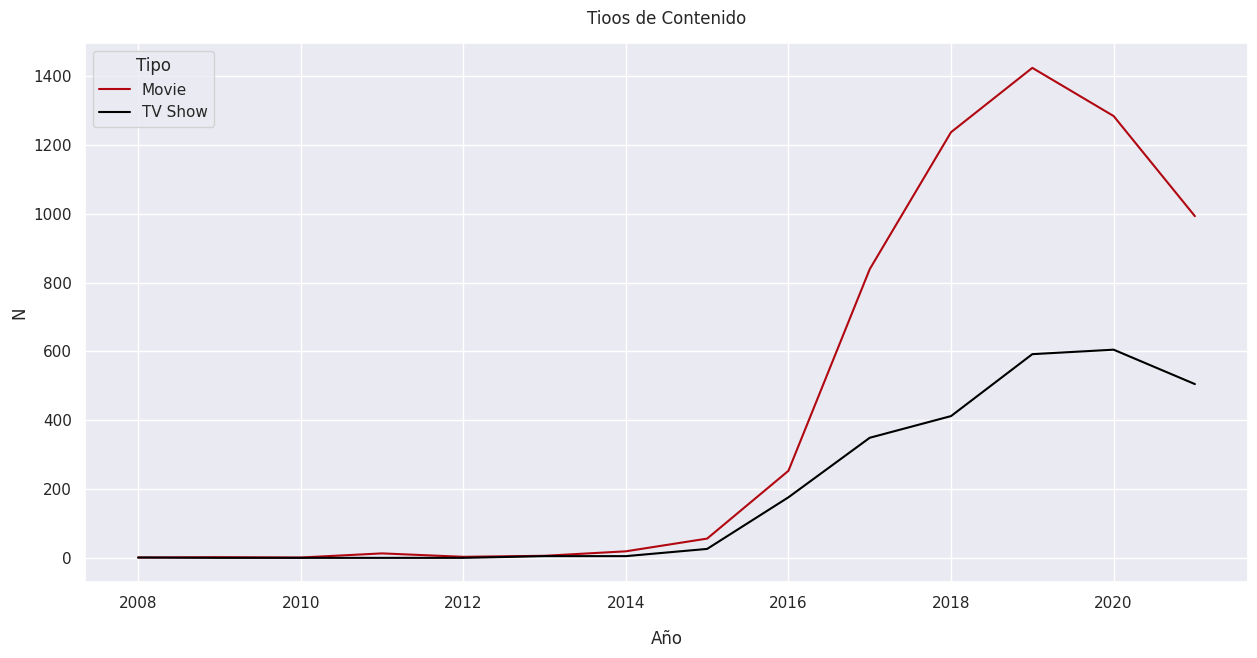

In [ ]:
df = data.groupby('year_added')['type'].value_counts().reset_index(name='level_1')
df = df.rename(columns={'level_1':'count', 'type':'Tipo'})

fig, ax = plt.subplots(figsize=(15,7))

sns.lineplot(x='year_added',y='count', data=df, hue="Tipo", palette=["#B00710","#000"])
ax.set_xlabel('Año', labelpad=14)
ax.set_ylabel('N')
ax.set_title('Tioos de Contenido', pad=14)
plt.show()

Después del año 2015 se agrega una gran
cantidad de contenido en Netflix.

El contenido tipo películas se ha
agregado en Netflix a un ritmo mucho mayor que los programas de televisión.

Hay una caída significativa en la adición de contenido en ambos tipos después de 2019 debido a Covid.

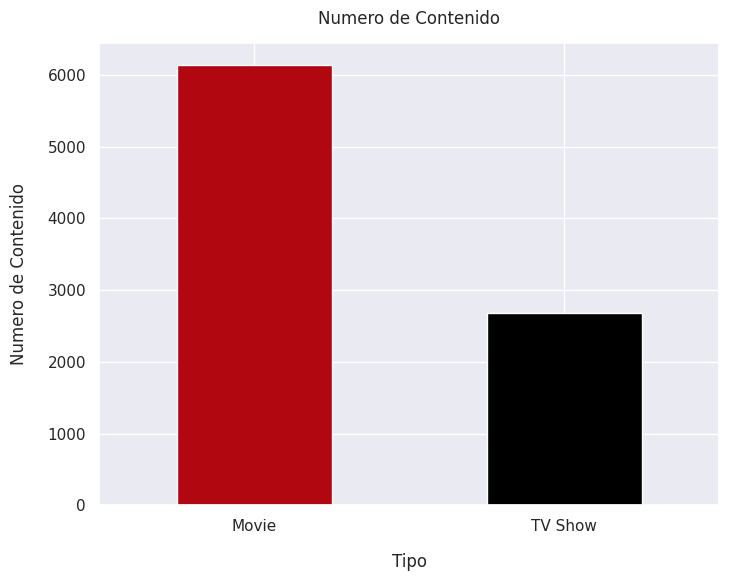

In [ ]:
from seaborn.widgets import color_palette
ax = data.type.value_counts().plot(kind='bar', figsize = (8,6),rot=0, color=["#B00710","#000"])
ax.set_xlabel('Tipo',labelpad=14)
ax.set_ylabel('Numero de Contenido', labelpad=14)
ax.set_title('Numero de Contenido', pad=14)
plt.show()


Se agrega una gran cantidad de películas en Netflix en comparación con programas de televisión.

In [ ]:
netflix_shows=netflix[netflix['type']=='TV Show']
netflix_movies=netflix[netflix['type']=='Movie']

[[<matplotlib.axis.XTick at 0x7da65207bca0>,

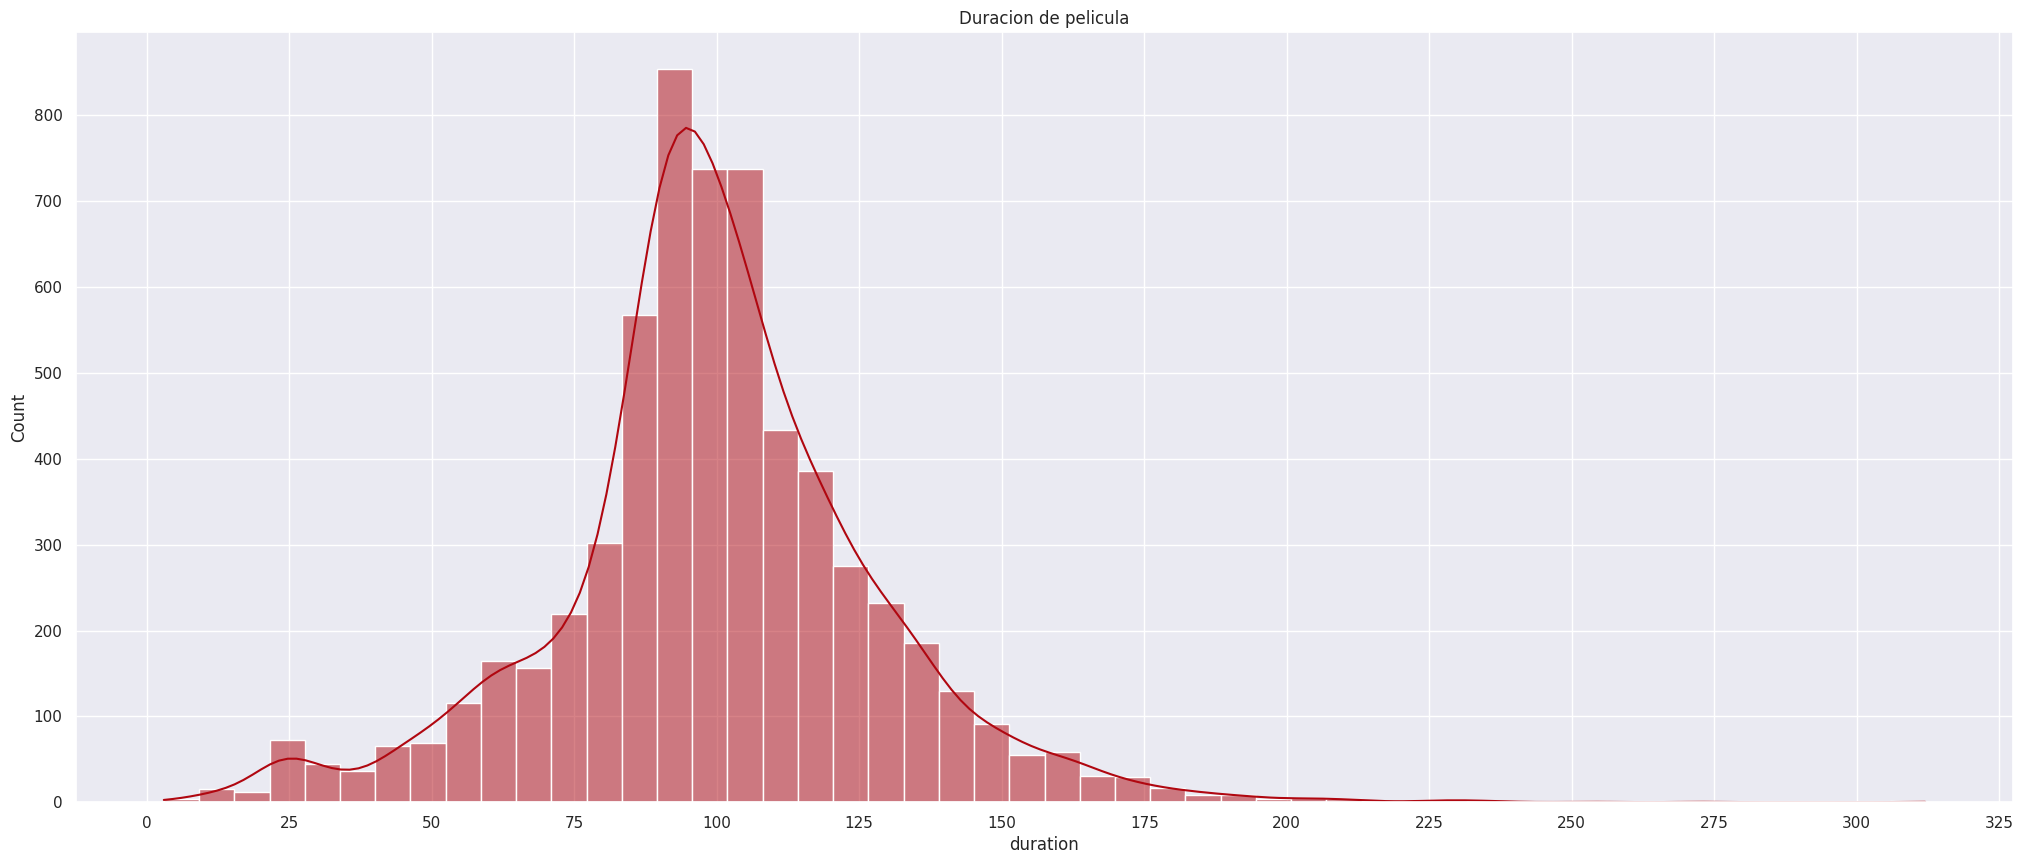

In [ ]:
# - What is the most common durations of Movies?

movie_durations = data[data['duration'].str.contains('min')]['duration'].apply(lambda x: x.split()[0]).astype('int')

# Hist plot with KDE
fig, (ax1) = plt.subplots(1, figsize=(25,10))
g = sns.histplot(movie_durations, kde=True, color="#B00710", bins=50, ax = ax1)
ax1.set_title('Duracion de pelicula')
g.set(xticks=np.arange(0, 350, 25))


Generalmente las películas tienen una duración de alrededor de 100 minutos.
También alrededor de los 25 minutos hay un aumento en el conteo debido a los cortometrajes.

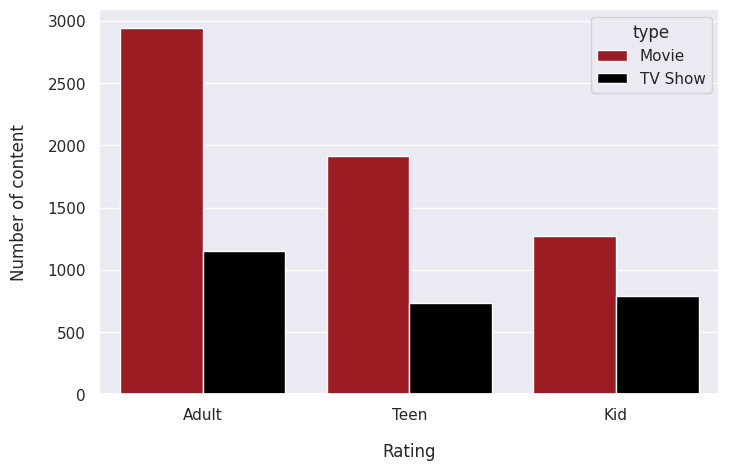

In [ ]:
# We are dividing audiance in three types as per rating column
Kids = ['TV-Y', 'TV-Y7', 'G', 'TV-G', 'PG', 'TV-PG', 'TV-Y7-FV']
Teens = ['PG-13', 'TV-14']
Adults = ['R', 'TV-MA', 'NC-17', 'UR', 'NR']

def rate(x):
    if x in Kids:
        return 'Kid'
    elif x in Teens:
        return 'Teen'
    elif x in Adults:
        return 'Adult'

df1 = data['rating'].apply(rate)
df2 = pd.concat([df1, data['type']], axis=1)
plt.figure(figsize=(8,5), dpi=100)
ax = sns.countplot(x='rating',data=df2, hue='type', order=['Adult', 'Teen', 'Kid'], palette=["#B00710","#000000"])
ax.set_ylabel('Number of content', labelpad=14)
ax.set_xlabel('Rating', labelpad=14)
plt.show()


Netflix agregó muchas películas para adultos en comparación con programas de televisión para adultos.
El contenido para adultos y adolescentes es el contenido más común en Netflix.

Text(0.5, 1.0, 'Top 20 Paises por año')

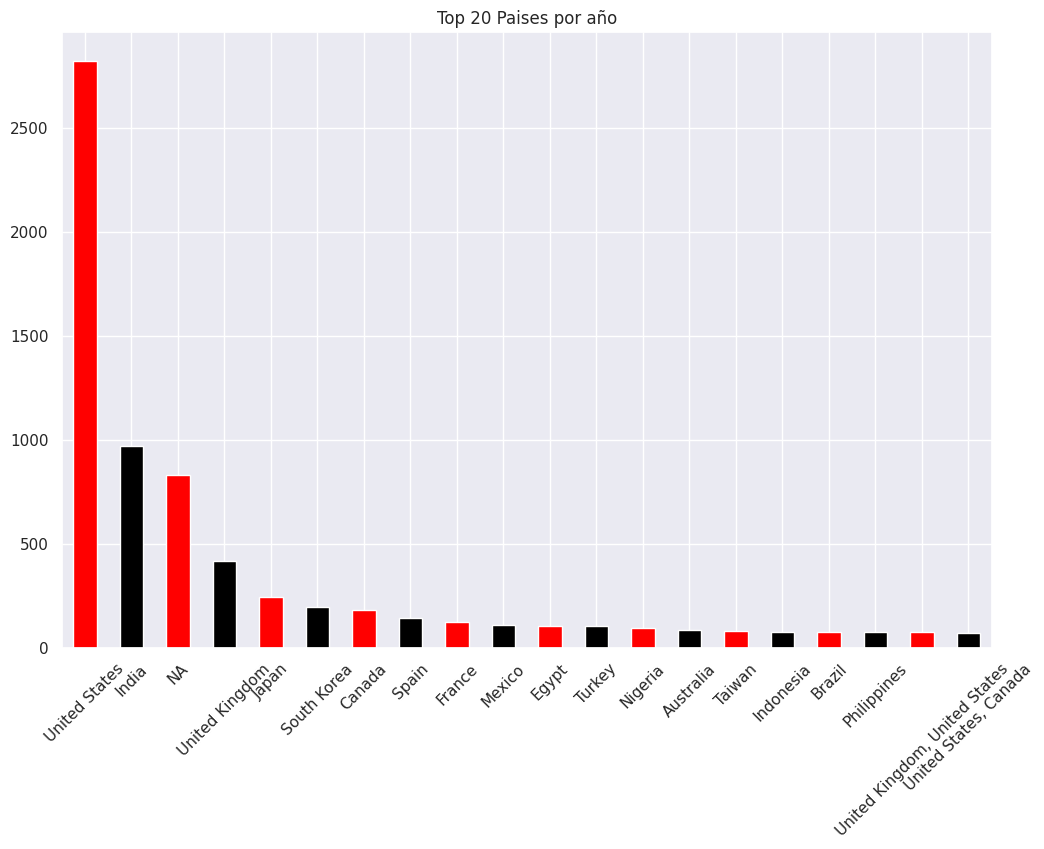

In [ ]:
data['country'].value_counts()[:20].plot(kind='bar',rot=45,color=['red','black'],figsize=(12,8))
plt.title('Top 20 Paises por año')

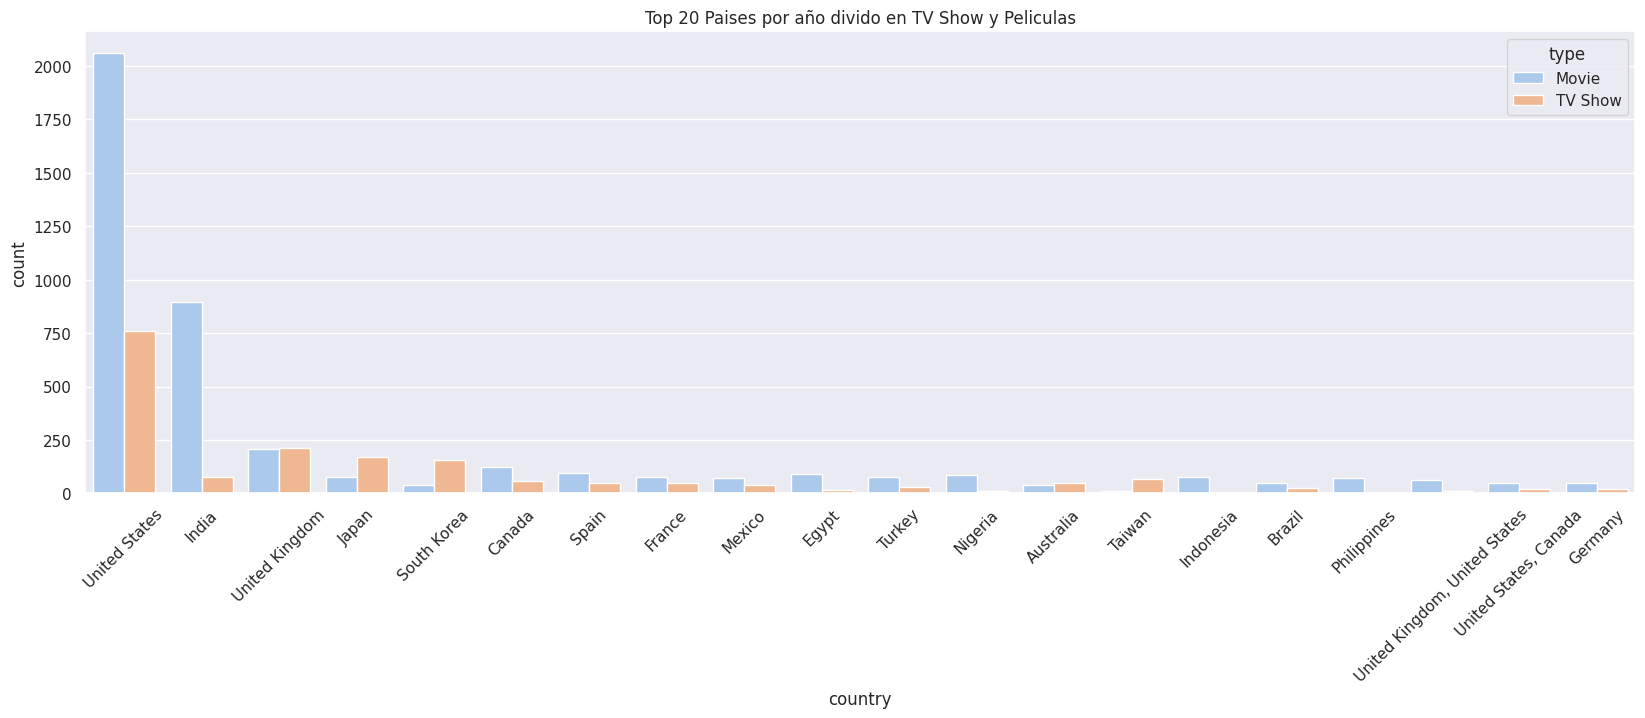

In [ ]:
#print(netflix["country"].value_counts().head())
plt.figure(figsize=(20,6))
sns.countplot(x="country",data= netflix,hue= "type",order = netflix['country'].value_counts().index[0:20],palette="pastel")
plt.xticks(rotation=45)
plt.title('Top 20 Paises por año divido en TV Show y Peliculas')
plt.show()

El orden de las 20 mejores películas y programas de televisión es diferente.
En países como India y España, las películas alemanas son más populares que los programas de televisión.
En países como Japón, Corea del Sur y Taiwán, los programas de televisión son más populares que las películas.

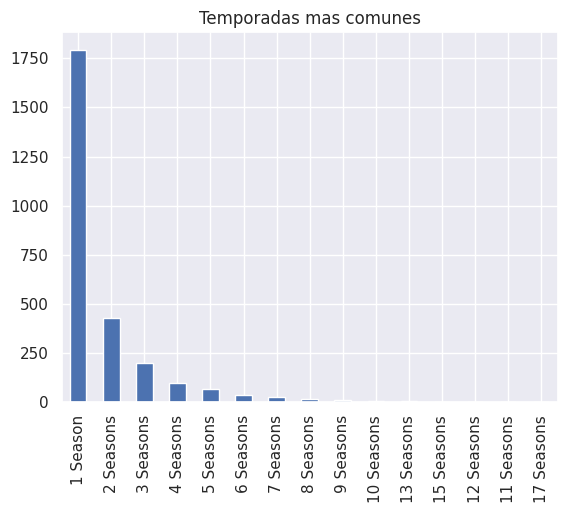

In [ ]:
data[netflix['type']=="TV Show"]['duration'].value_counts().plot(kind="bar")
plt.title('Temporadas mas comunes')
plt.show()



Hay una caída significativa en el recuento de temporadas después de la temporada 1.
Los programas de televisión son en su mayoría de 1 a 2 temporadas.

In [ ]:
netflix['cast'].value_counts()

David Attenborough                                                                                                                                                                            19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                                                                                       14
Samuel West                                                                                                                                                                                   10
Jeff Dunham                                                                                                                                                                                    7
David Spade, London Hughes, Fortune Feimster                                                                                                                                                   6
                                   

<ipython-input-57-4310967826de>:9: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  .pivot("country", "year_added", 0)


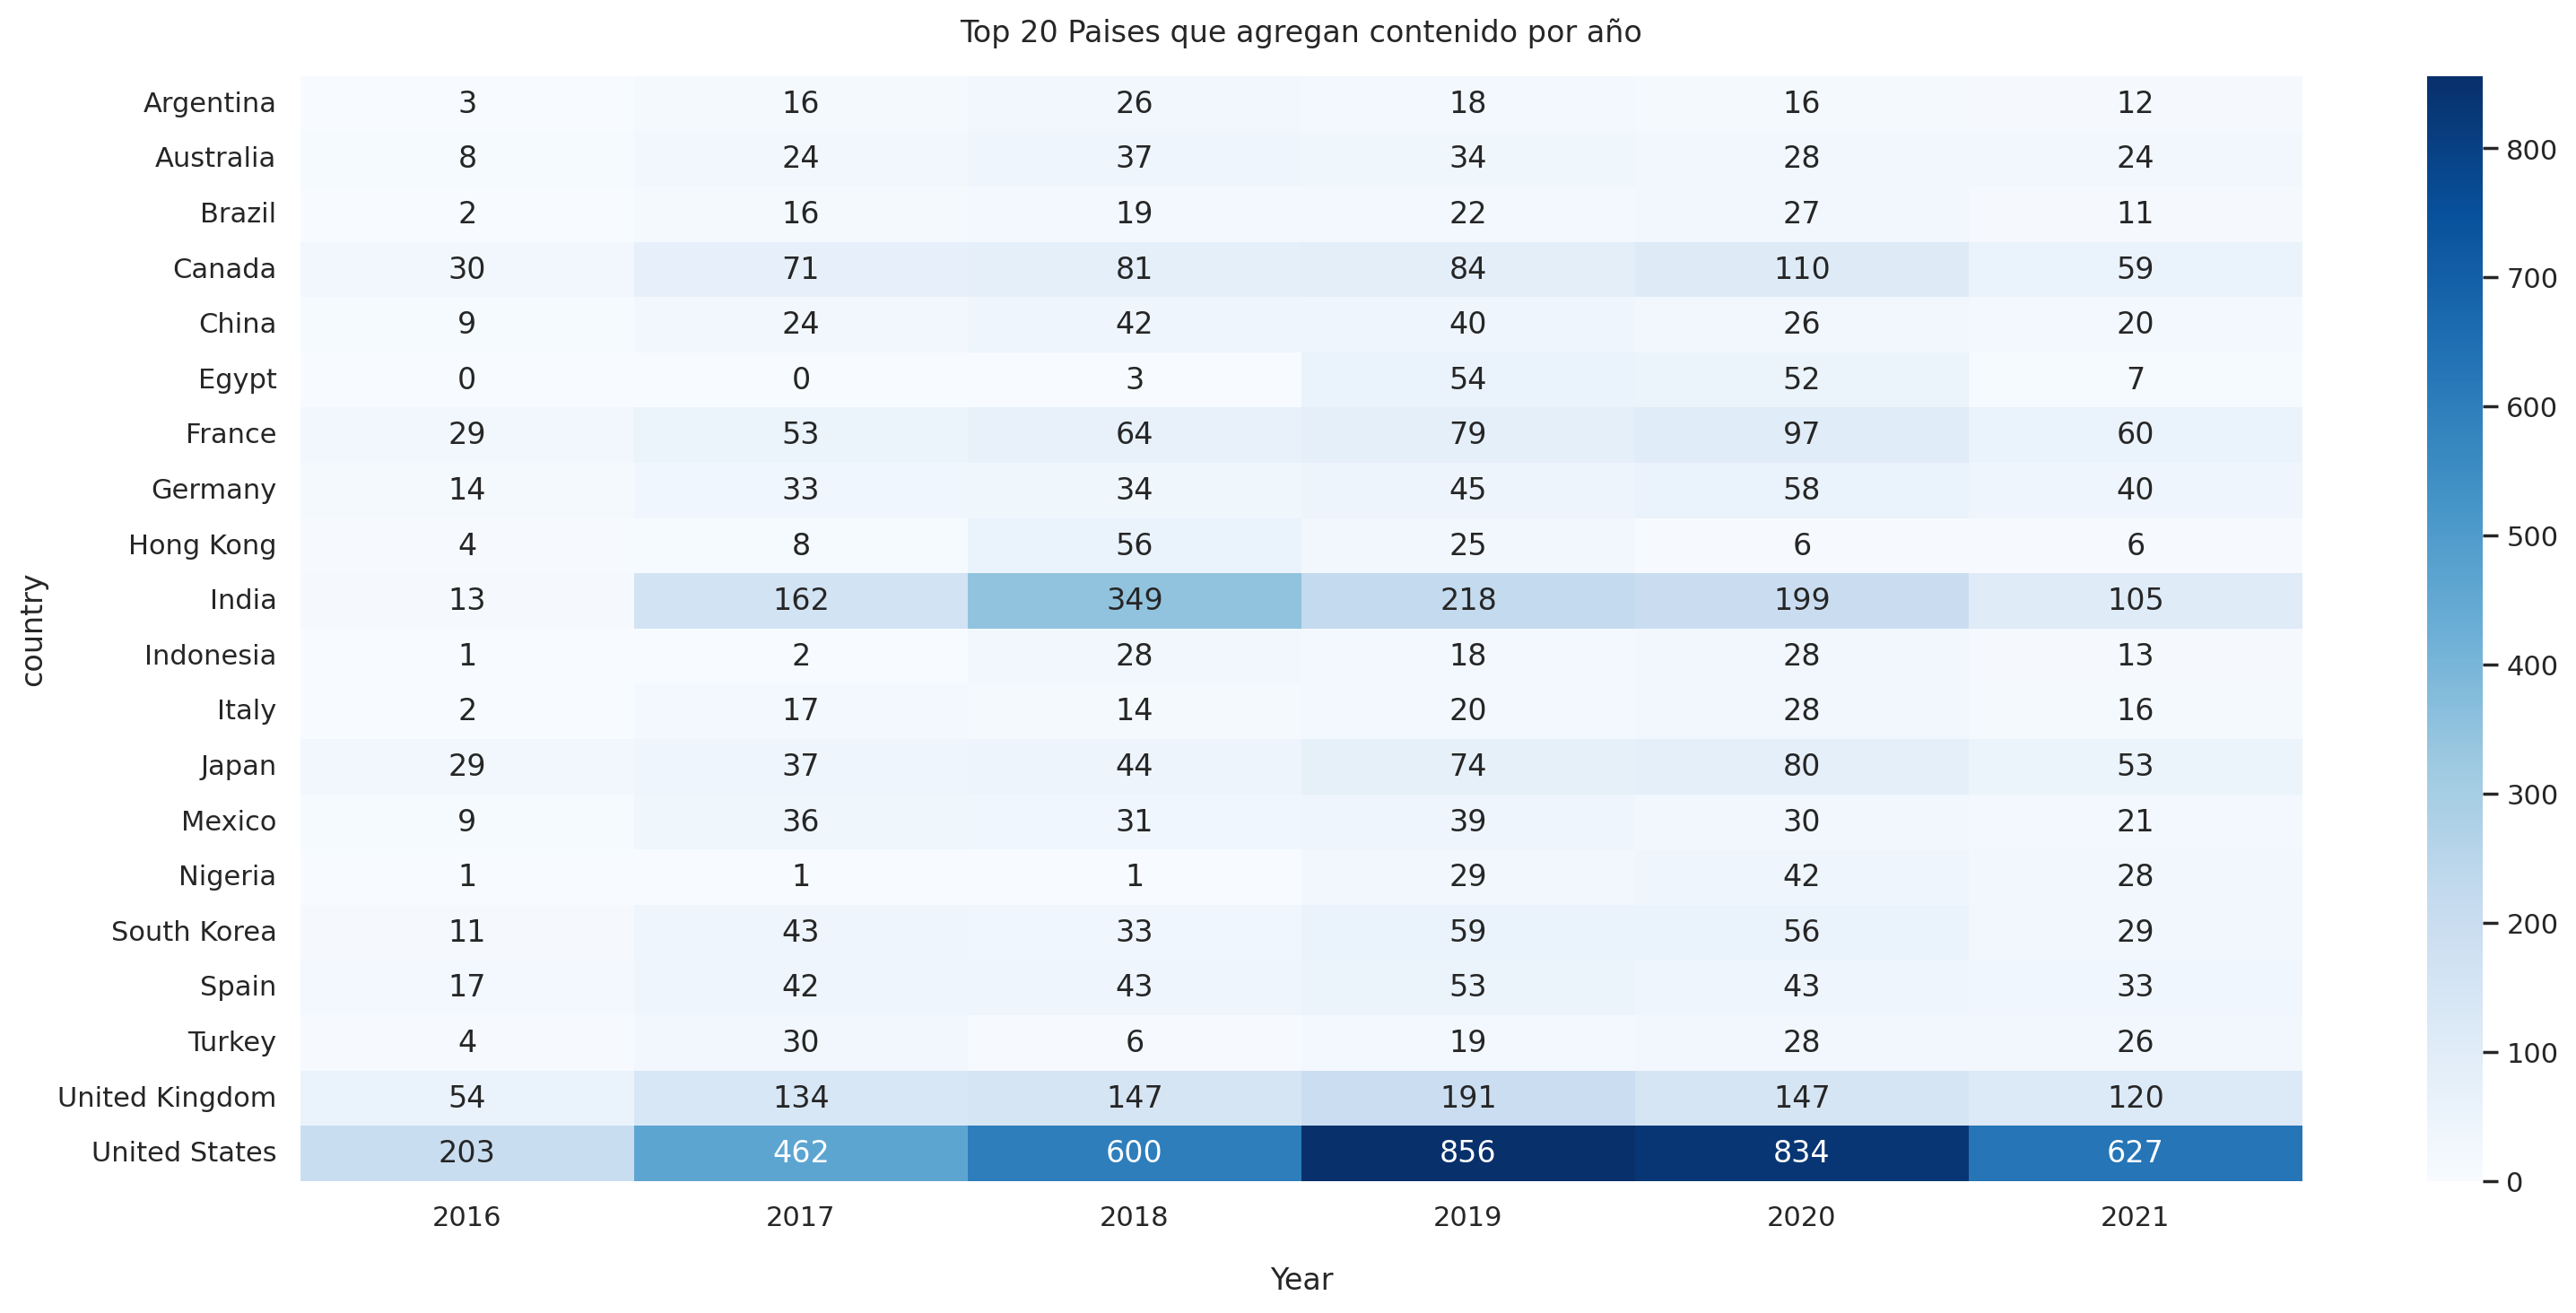

In [ ]:

country_data = explode_data(data, 'country', 'country')

country_data = country_data[country_data['year_added']>2015]
country_data = (
    country_data
    [country_data['country'].isin(country_data['country'].value_counts().head(20).index)]
    .value_counts()
    .reset_index()
    .pivot("country", "year_added", 0)
    .fillna(0)
    .apply(lambda x: x.astype('int'))
)

plt.figure(figsize=(18,8), dpi=200)
ax = sns.heatmap(country_data, annot=True, fmt="d", cmap=sns.color_palette("Blues", as_cmap=True))

ax.set_xlabel('Year', labelpad=14)
ax.set_title('Top 20 Paises que agregan contenido por año', pad=14)
plt.show()

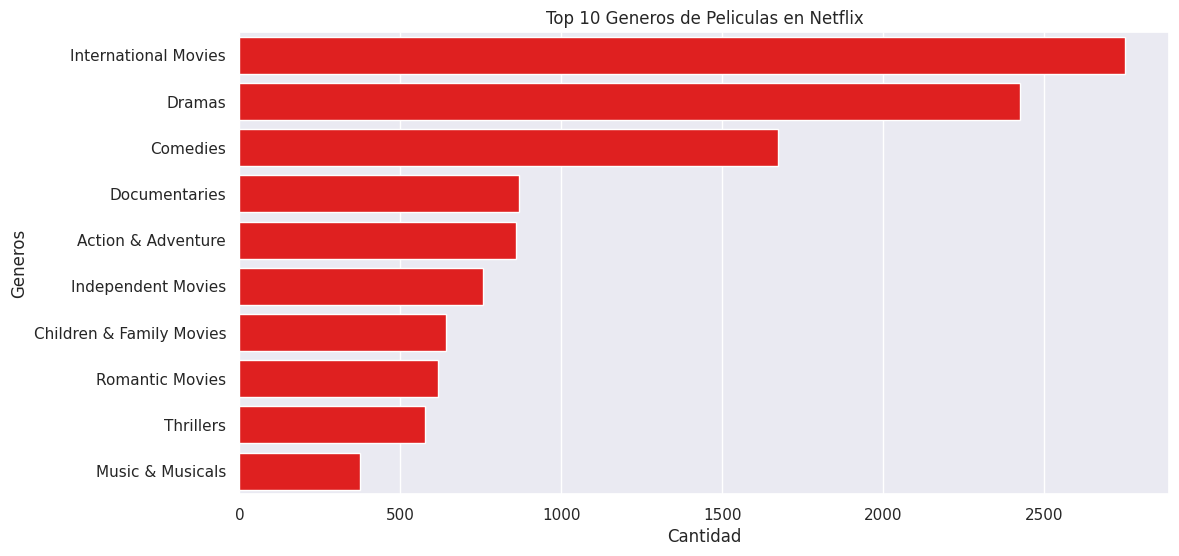

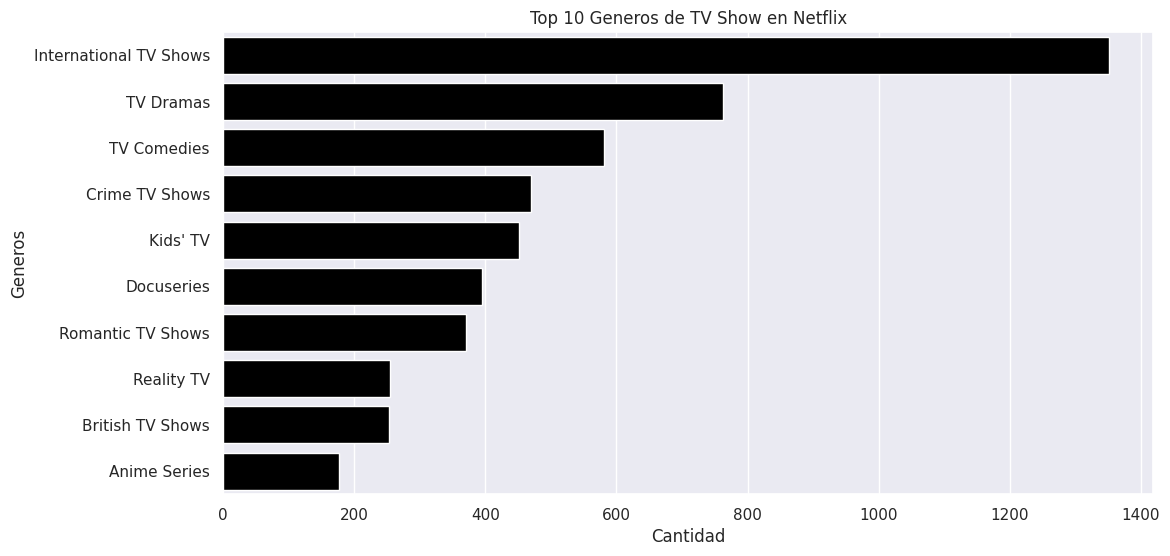

In [ ]:
#Para Peliculas
filtered_genres = netflix_movies.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);

plt.figure(figsize=(12,6))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:10], color = "red")
plt.title('Top 10 Generos de Peliculas en Netflix')
plt.xlabel('Cantidad')
plt.ylabel('Generos')
plt.show()

#Para Tv Show
filtered_genres = netflix_shows.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);

plt.figure(figsize=(12,6))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:10], color = "Black")
plt.title('Top 10 Generos de TV Show en Netflix')
plt.xlabel('Cantidad')
plt.ylabel('Generos')
plt.show()

Géneros de programas de televisión Los programas de televisión sobre crímenes y la televisión para niños son más populares que sus géneros similares en las películas.
Los géneros de películas, Documentales y Acción y Aventura, son más populares que sus géneros similares en los programas de televisión.

<ipython-input-59-549a12dd9d9b>:9: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  .pivot("genre", "year_added", 0)


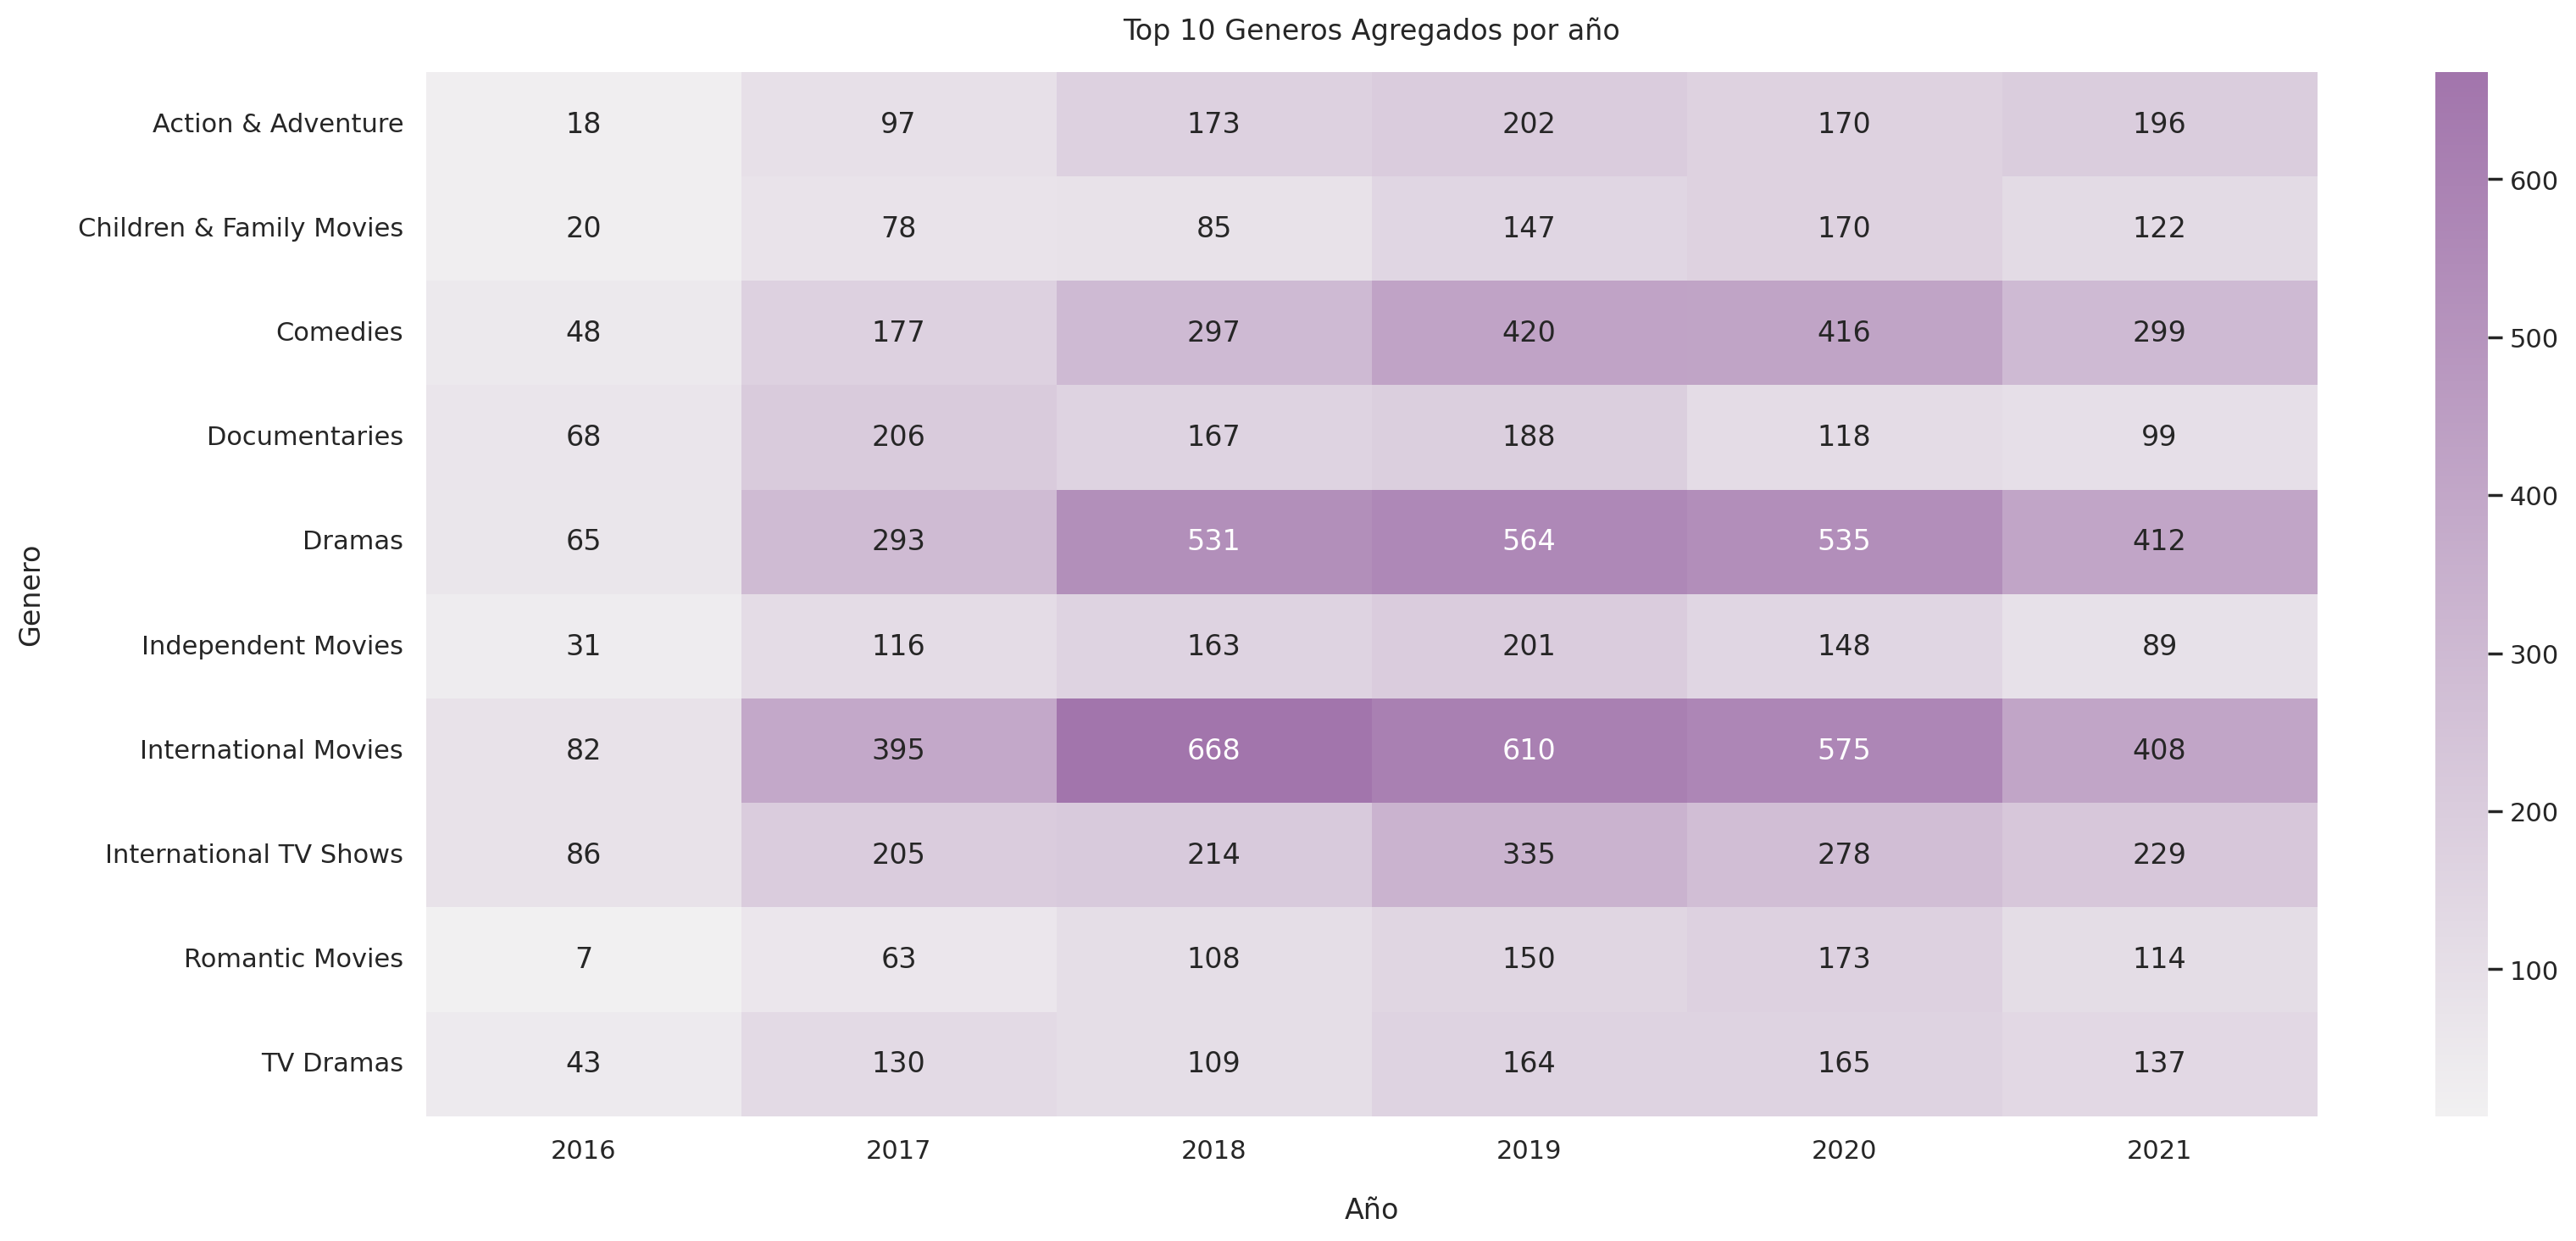

In [ ]:
genre_data = explode_data(data, 'listed_in', 'genre')

genre_data = genre_data[genre_data['year_added']>2015]
genre_data = (
    genre_data
    [genre_data['genre'].isin(genre_data['genre'].value_counts().head(10).index)]
    .value_counts()
    .reset_index()
    .pivot("genre", "year_added", 0)
    .fillna(0)
    .apply(lambda x: x.astype('int'))
)

plt.figure(figsize=(18,8), dpi=200)
ax = sns.heatmap(genre_data, annot=True, fmt="d", cmap=sns.light_palette("#a275ac", as_cmap=True))

ax.set_ylabel('Genero', labelpad=14)
ax.set_xlabel('Año', labelpad=14)
ax.set_title('Top 10 Generos Agregados por año', pad=14)
plt.show()




* Los tres géneros más populares en los últimos años son películas internacionales, dramas, comedias, programas de televisión internacionales y acción y aventura
* En el año 2017 es donde hubo un incremento donde en todos aumento más 200% en todas las categorias

<ipython-input-66-17242f4d83c3>:19: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  .pivot("genre", "country", 0)
<ipython-input-66-17242f4d83c3>:19: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  .pivot("genre", "country", 0)


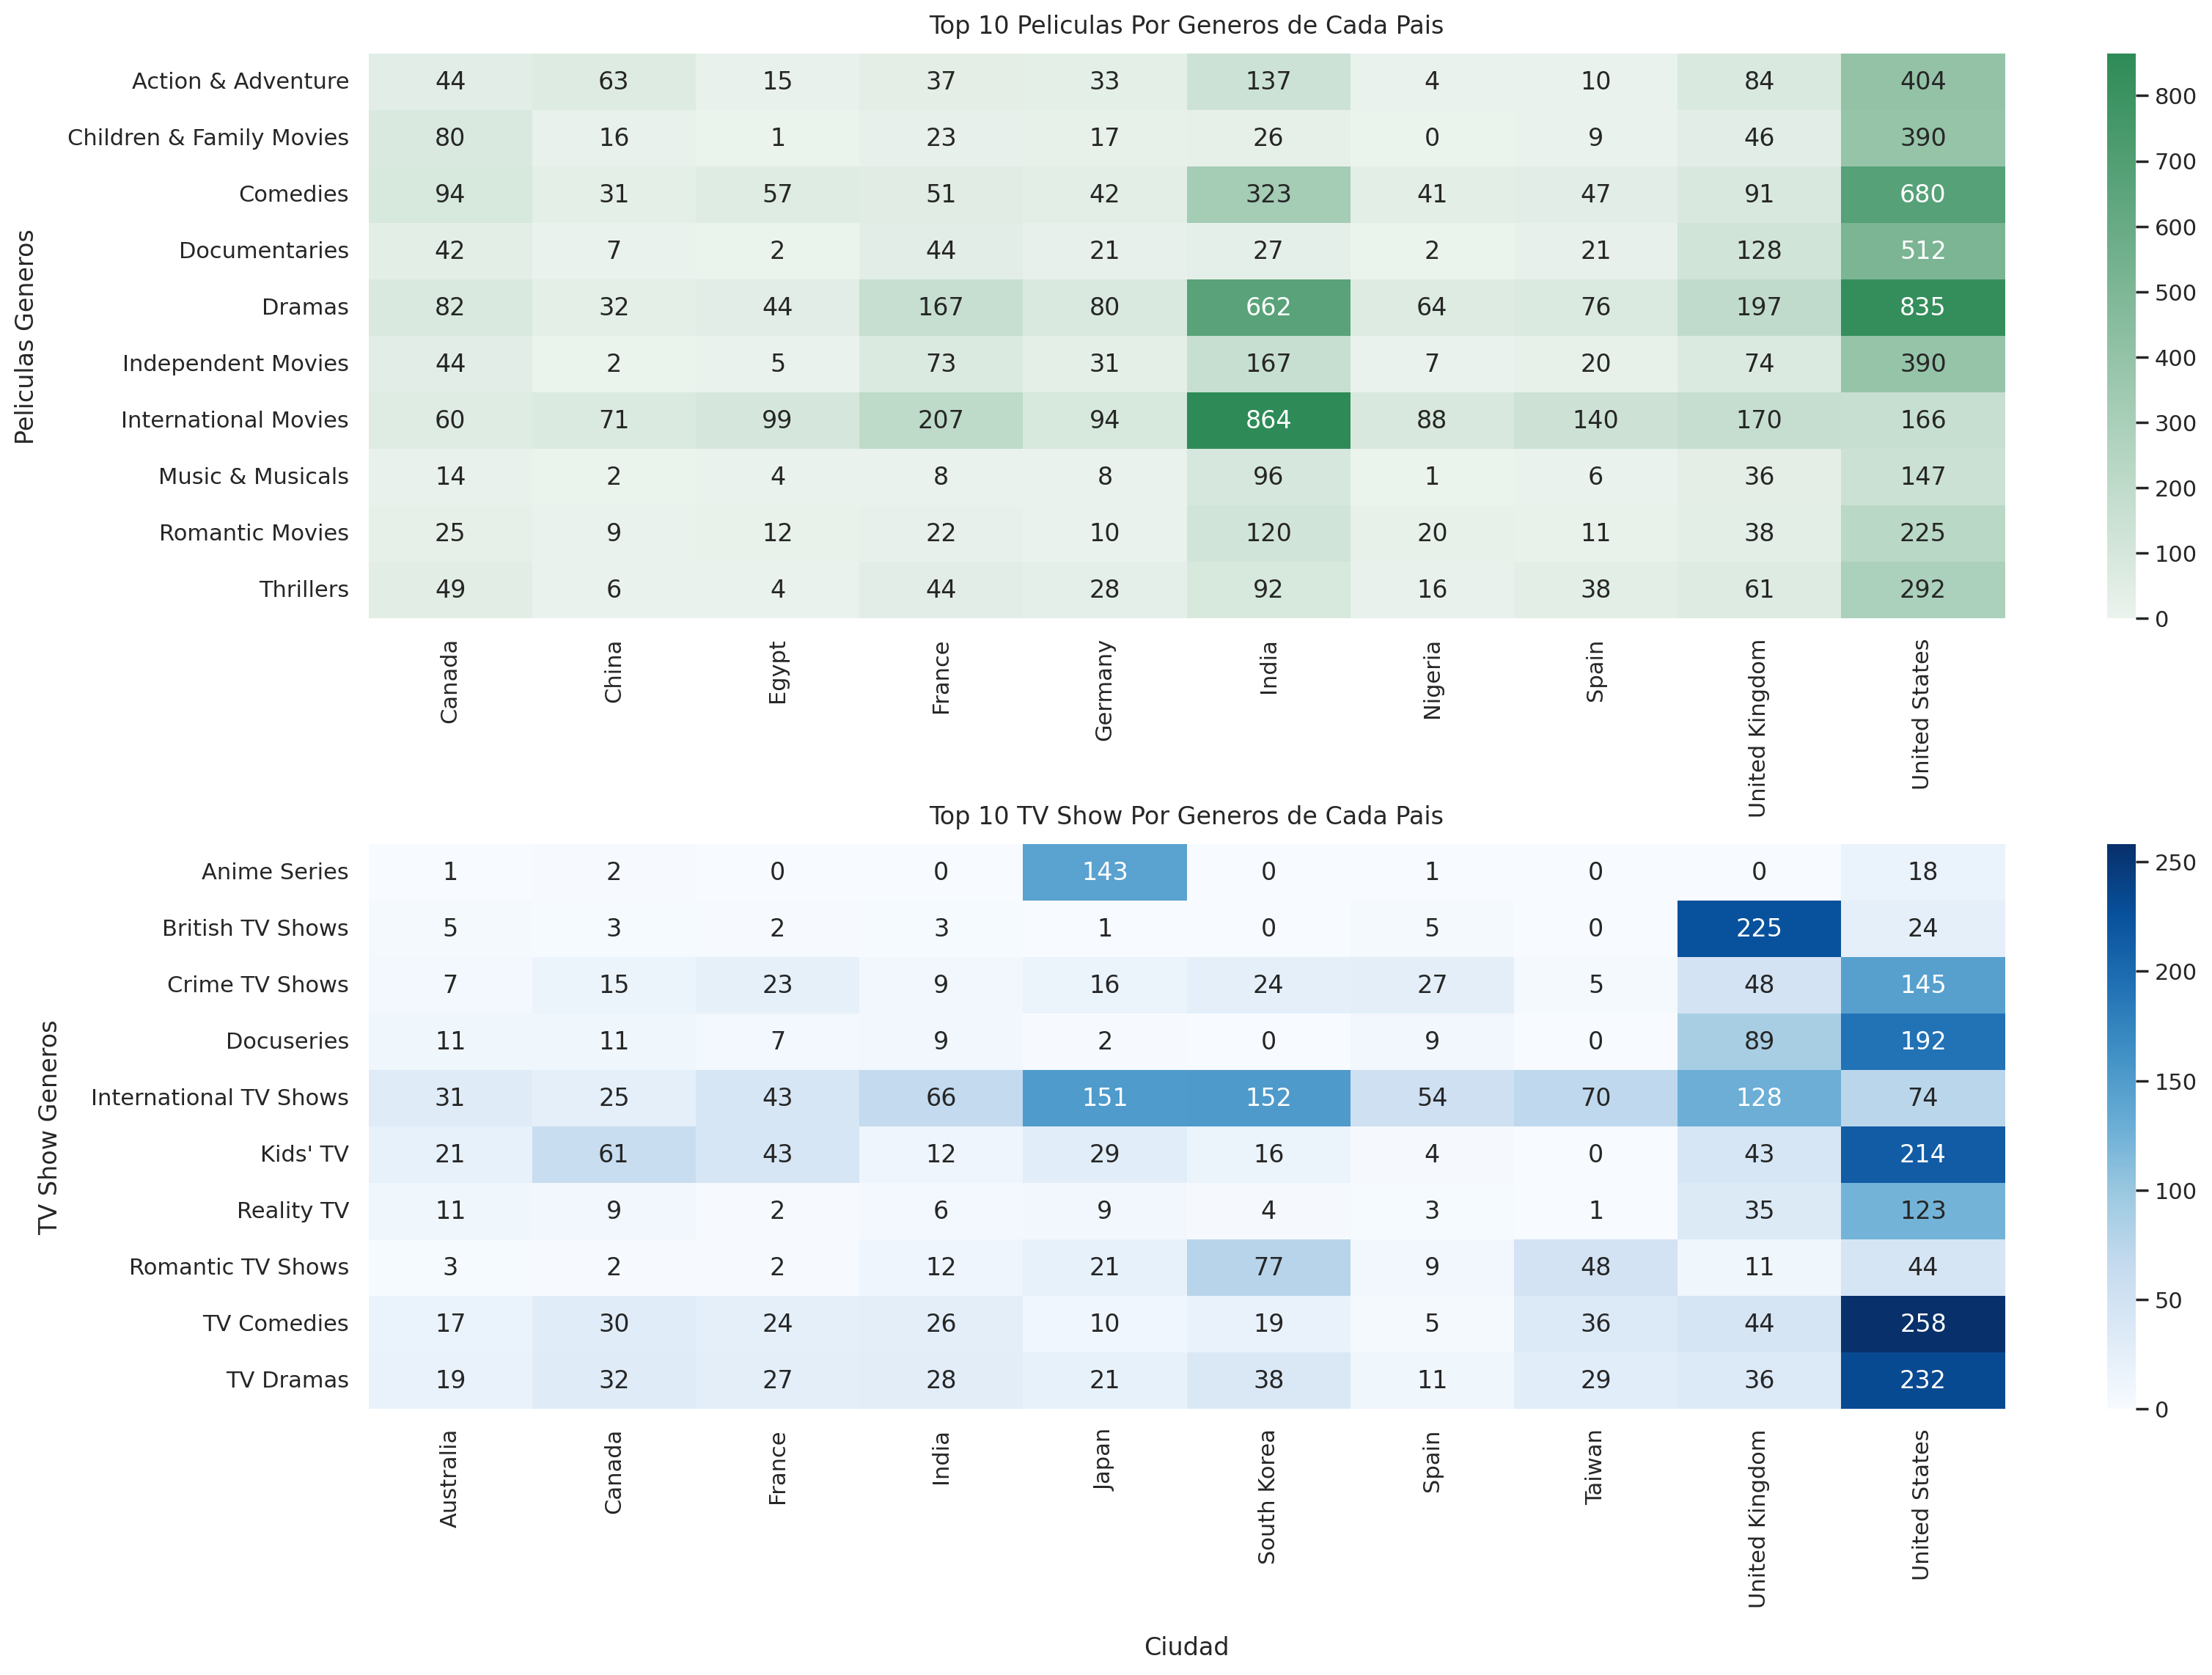

In [ ]:
country_data = explode_data(data, 'country', 'country', 'title')
genre_data = explode_data(data, 'listed_in', 'genre', 'title')
genre_data_type = explode_data(data, 'listed_in', 'genre', 'type')

genre_data_type = genre_data_type.value_counts().reset_index(level=1)
top_movie_genres = list(genre_data_type.loc['Movie'].head(10)['genre'].values)
top_tv_genres = list(genre_data_type.loc['TV Show'].head(10)['genre'].values)

df = country_data.merge(genre_data).drop('title', axis=1)
df1 = df[df['genre'].isin(top_movie_genres)]
df2 = df[df['genre'].isin(top_tv_genres)]

def make_data(df):
    return (
        df
        [df['country'].isin(df['country'].value_counts().head(10).index)]
        .value_counts()
        .reset_index()
        .pivot("genre", "country", 0)
        .fillna(0)
        .apply(lambda x: x.astype('int'))
        )

df1 = make_data(df1)
df2 = make_data(df2)

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(18,12), dpi=200)
fig.subplots_adjust(hspace=0.4)

sns.heatmap(df1, annot=True, fmt="d", cmap=sns.light_palette("seagreen", as_cmap=True), ax=ax1)
ax1.set_xlabel('Ciudad', labelpad=14)
ax1.set_ylabel('Peliculas Generos', labelpad=14)
ax1.set_title('Top 10 Peliculas Por Generos de Cada Pais', pad=10)

sns.heatmap(df2, annot=True, fmt="d", cmap=sns.color_palette("Blues", as_cmap=True)
, ax=ax2)
ax2.set_xlabel('Ciudad', labelpad=14)
ax2.set_ylabel('TV Show Generos', labelpad=14)
ax2.set_title('Top 10 TV Show Por Generos de Cada Pais', pad=10)
plt.show()

**Top TV Show Por Generos de Cada Pais**
*   El anime es el mas popular en Japon y otros paises no nada popular
*   Los espectadores de estados Unidos ven muchos tipos de generos
*   los TV Show internacionales son los mas aceptados por cualquier paises

**Top Peliculas Por Generos de Cada Pais**

* Los espectadores de estados Unidos ven muchos tipos de generos
* Los Peliculas internacionales y Los dramas son los mas aceptados por cualquier de los paises
*   los Chinos ve muy poco contenido de peliculas en netflix







<Axes: >

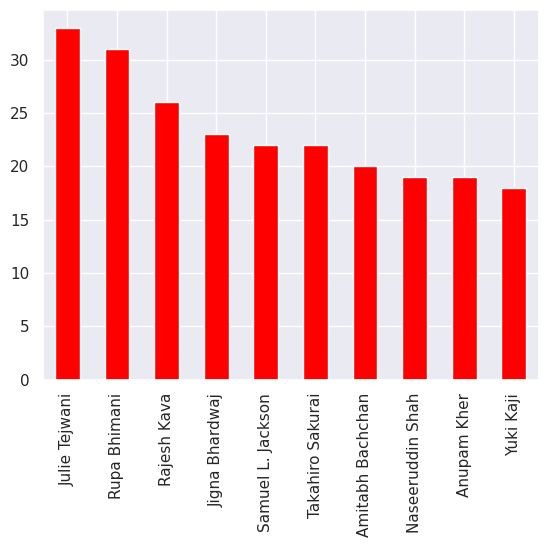

In [ ]:
cast_data = explode_data(data, 'cast', 'cast')
actores = cast_data[cast_data['year_added']>=2019]['cast'].value_counts().head(10)
actores[:10].plot(kind='bar', color='red')





En los últimos años, Netflix ha añadido contenidos en los que los principales actores son generalmente actores de doblaje. Así que no hay ninguna indicación clara que podamos obtener de estos datos.
En los últimos años los artistas de doblaje han trabajado principalmente en películas de animación y programas de televisión que no pertenecen al género top


In [ ]:
cast_data = explode_data(data, 'cast', 'cast')
actores = cast_data[cast_data['year_added']>=2019]['cast'].value_counts().head(10)

cast_data_grouped = cast_data[cast_data['year_added'] >= 2019].groupby(['year_added', 'cast']).size().reset_index(name='count')


<Axes: >

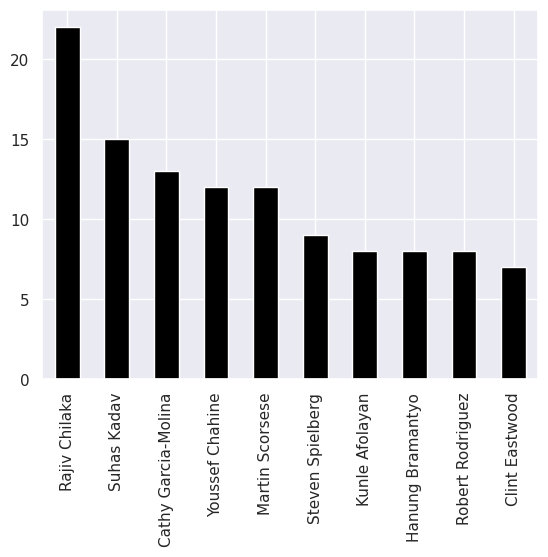

In [ ]:
director_data = explode_data(data, 'director', 'director')
directores = director_data[director_data['year_added']>=2019]['director'].value_counts().head(10)
directores[:10].plot(kind='bar', color='black')


El mismo patrón que podemos ver aquí, el top de 2 de directores que dirigieron la mayoría de las películas/ programas de televisión es para el contenido de animación añadido en los últimos años

<Axes: xlabel='Casting'>

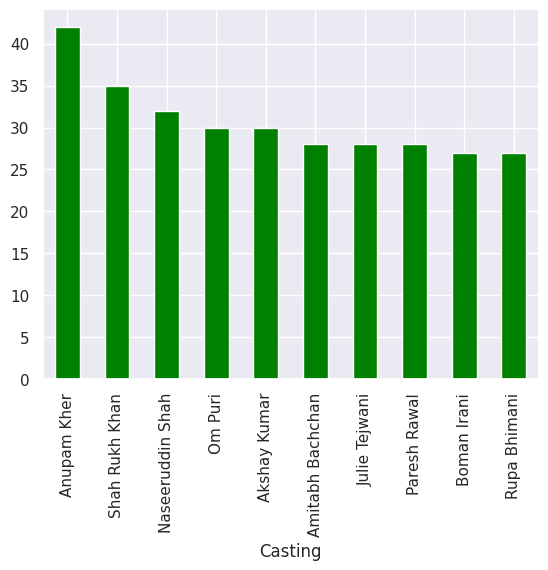

In [ ]:
cast_data = explode_data(data, 'cast', 'Casting', 'type')
castindio = cast_data.value_counts().loc['Movie'].head(10)
castindio[:10].plot(kind='bar', color='green')


Podemos ver que, en el reparto de las 10 mejores películas, la mayoría de la gente es de la india